In [79]:
#insert libraties
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import warnings
import zipcodes as zcode # to get zipcodes


In [80]:
Data = pd.read_csv("D:/Bank_Personal_Loan_Modelling(1).csv")
Data.describe()

ID          Age   Experience       Income       ZIPCode  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  PersonalLoan  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean      2.396400     1.937938     1.881000    56.498800      0.096000   
std       1.147663     1.747659     0.839869   101.713802      0.294621   
min       1.000000     0.000000     1.000000     0.000000      0.000000   
25%       1.000000     0.700000     1.000000     0.000000      0.000000   
50%       2.000000     1.500000     2.000000     0.000000      0.000000   
75%       3.000000     2.500000     3.000000   101.000000      0.000000   
max       4.000000    10.000000     3.000000   635.000000      1.000000   

       Securities-Account  CD-Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [81]:
# یک دیتافریم درست می کنیم
df = pd.DataFrame(Data)

In [82]:
df

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
0        1   25           1      49    91107       4    1.6          1   
1        2   45          19      34    90089       3    1.5          1   
2        3   39          15      11    94720       1    1.0          1   
3        4   35           9     100    94112       1    2.7          2   
4        5   35           8      45    91330       4    1.0          2   
...    ...  ...         ...     ...      ...     ...    ...        ...   
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  PersonalLoan  Securities-Account  CD-Account  Online  \
0            0             0                   1           0       0   
1            0             0                   1           0       0   
2            0             0                   0           0       0   
3            0             0                   0           0       0   
4            0             0                   0           0       0   
...        ...           ...                 ...         ...     ...   
4995         0             0                   0           0       1   
4996        85             0                   0           0       1   
4997         0             0                   0           0       0   
4998         0             0                   0           0       1   
4999         0             0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [83]:
#تمام سطرهای دیتافریم رو می توانیم مشاهده کنیم
#pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [84]:
# remove ID  columns
#نیازی به  ستون  آیدی در مدل سازی نداریم
df.drop("ID", axis=1, inplace=True)


In [85]:
df

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0      25           1      49    91107       4    1.6          1         0   
1      45          19      34    90089       3    1.5          1         0   
2      39          15      11    94720       1    1.0          1         0   
3      35           9     100    94112       1    2.7          2         0   
4      35           8      45    91330       4    1.0          2         0   
...   ...         ...     ...      ...     ...    ...        ...       ...   
4995   29           3      40    92697       1    1.9          3         0   
4996   30           4      15    92037       4    0.4          1        85   
4997   63          39      24    93023       2    0.3          3         0   
4998   65          40      49    90034       3    0.5          2         0   
4999   28           4      83    92612       3    0.8          1         0   

      PersonalLoan  Securities-Account  CD-Account  Online  CreditCard  
0                0                   1           0       0           0  
1                0                   1           0       0           0  
2                0                   0           0       0           0  
3                0                   0           0       0           0  
4                0                   0           0       0           1  
...            ...                 ...         ...     ...         ...  
4995             0                   0           0       1           0  
4996             0                   0           0       1           0  
4997             0                   0           0       0           0  
4998             0                   0           0       1           0  
4999             0                   0           0       1           1  

[5000 rows x 13 columns]

In [86]:
#می خواهیم ده سطر اول دیتاست را مشاهده کنیم
df.head(10)

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   
5   37          13      29    92121       4    0.4          2       155   
6   53          27      72    91711       2    1.5          2         0   
7   50          24      22    93943       1    0.3          3         0   
8   35          10      81    90089       3    0.6          2       104   
9   34           9     180    93023       1    8.9          3         0   

   PersonalLoan  Securities-Account  CD-Account  Online  CreditCard  
0             0                   1           0       0           0  
1             0                   1           0       0           0  
2             0                   0           0       0           0  
3             0                   0           0       0           0  
4             0                   0           0       0           1  
5             0                   0           0       1           0  
6             0                   0           0       1           0  
7             0                   0           0       0           1  
8             0                   0           0       1           0  
9             1                   0           0       0           0

In [87]:
#با این دستور تعداد سطر و ستون را مشاهده می کنیم
df.shape

(5000, 13)

In [88]:
#اطلاعات خوبی از دیتاست به ما میدهد
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   PersonalLoan        5000 non-null   int64  
 9   Securities-Account  5000 non-null   int64  
 10  CD-Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [89]:
# میخواهیم بررسی کنیم که هر کدام از ستون ها چه قدر میسینگ ولیو دارد
Data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
PersonalLoan          0
Securities-Account    0
CD-Account            0
Online                0
CreditCard            0
dtype: int64

In [90]:
df.ZIPCode.nunique()

467

In [91]:
list_zipcode=df.ZIPCode.unique()
list_zipcode

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

In [92]:
#here i am creating a dictionary of county by using library zipcode and matching method.
dict_zip={}
for zipcode in list_zipcode:
    my_city_county = zcode.matching(zipcode.astype('str'))
    if len(my_city_county)==1: # if  zipcode is present then get county else, assign zipcode to county
        county=my_city_county[0].get('county')
    else:
        county=zipcode
    
    dict_zip.update({zipcode:county})

In [93]:
dict_zip

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

In [94]:
##We got almost all county expect for 96651,92634,93077,92717.
#We can fix this zip code by searching internet. Couldn't find for other zipcodes


In [95]:
dict_zip.update({92717:'Orange County'})
dict_zip.update({92634:'Orange County'})

In [96]:
df['County']=df['ZIPCode'].map(dict_zip)

In [97]:
df.County.nunique()

40

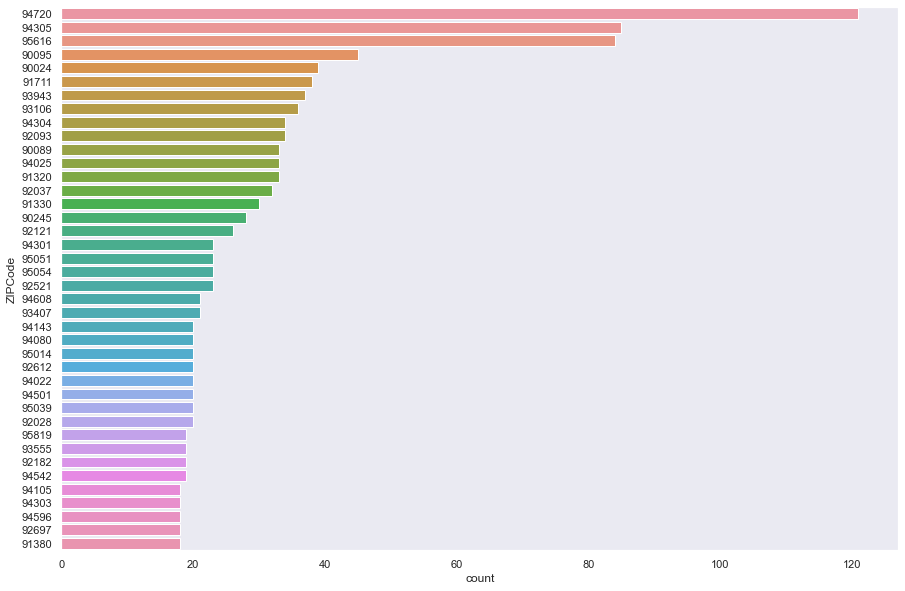

In [98]:
plt.figure(figsize=(15, 10))
sns.countplot(y=df[df.Mortgage==0]['ZIPCode'], 
              data=df, 
              order=df[df.Mortgage==0]['ZIPCode'].value_counts().index[:40]);
## Zip code 94720 has the highest mortgage value of 0, which is around 120, followed by zip code 94305

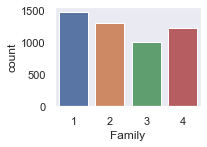

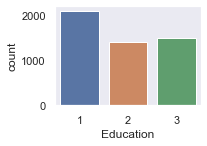

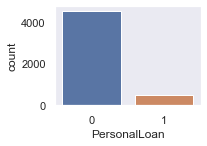

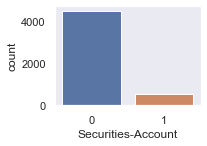

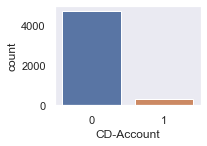

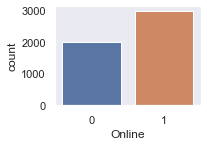

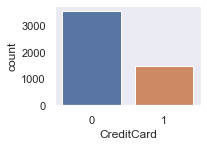

In [99]:
# برای ستون های کتگوریکال پلات از طریق سیبرن رسم می کنیم
categorical = ["Family","Education","PersonalLoan","Securities-Account","CD-Account","Online","CreditCard"]
i = 0
while i <7:
    fig = plt.figure(figsize =[12,4])
    plt.subplot(2,4,1)
    sns.countplot(x =categorical[i], data = Data )
    
    i+=1
    
    plt.show()

In [100]:
#جزئیات دیتا را مشاهده می کنیم
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

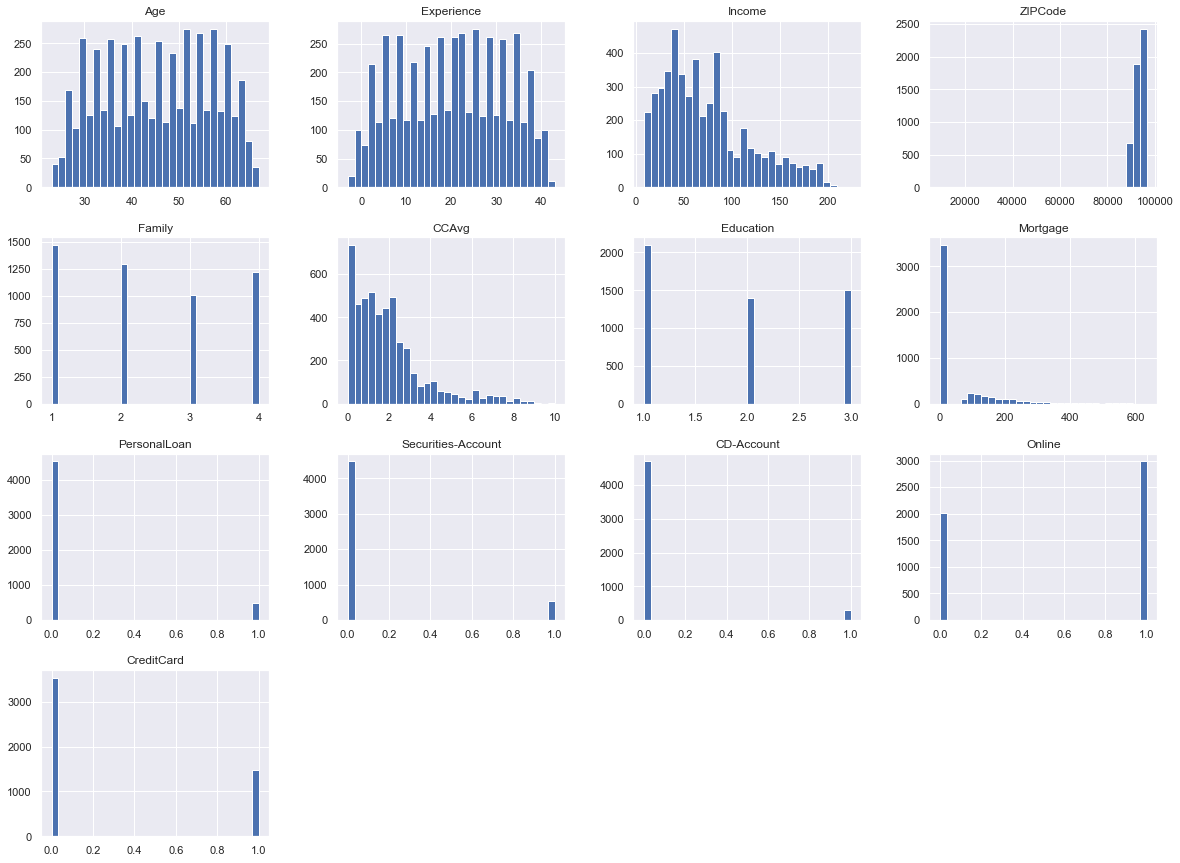

In [101]:
#نمودار هیستوگرام تک تک ستون ها را مشاهده می کنیم
#histogram
df.hist(bins=30,figsize=(20,15))
plt.show()

In [102]:
df

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0      25           1      49    91107       4    1.6          1         0   
1      45          19      34    90089       3    1.5          1         0   
2      39          15      11    94720       1    1.0          1         0   
3      35           9     100    94112       1    2.7          2         0   
4      35           8      45    91330       4    1.0          2         0   
...   ...         ...     ...      ...     ...    ...        ...       ...   
4995   29           3      40    92697       1    1.9          3         0   
4996   30           4      15    92037       4    0.4          1        85   
4997   63          39      24    93023       2    0.3          3         0   
4998   65          40      49    90034       3    0.5          2         0   
4999   28           4      83    92612       3    0.8          1         0   

      PersonalLoan  Securities-Account  CD-Account  Online  CreditCard  \
0                0                   1           0       0           0   
1                0                   1           0       0           0   
2                0                   0           0       0           0   
3                0                   0           0       0           0   
4                0                   0           0       0           1   
...            ...                 ...         ...     ...         ...   
4995             0                   0           0       1           0   
4996             0                   0           0       1           0   
4997             0                   0           0       0           0   
4998             0                   0           0       1           0   
4999             0                   0           0       1           1   

                    County  
0       Los Angeles County  
1       Los Angeles County  
2           Alameda County  
3     San Francisco County  
4       Los Angeles County  
...                    ...  
4995         Orange County  
4996      San Diego County  
4997        Ventura County  
4998    Los Angeles County  
4999         Orange County  

[5000 rows x 14 columns]

In [103]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set_palette(sns.color_palette("Set2", 8))
    tab1 = pd.crosstab(x,df['PersonalLoan'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['PersonalLoan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(7,4))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="Borrowed Loan",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    #plt.legend(labels)
    plt.show()

PersonalLoan     0    1   All
Family                       
1             1365  107  1472
2             1190  106  1296
3              877  133  1010
4             1088  134  1222
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


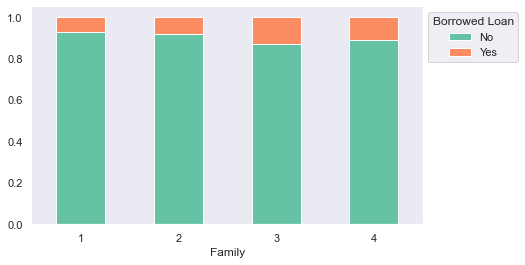

PersonalLoan     0    1   All
Education                    
1             2003   93  2096
2             1221  182  1403
3             1296  205  1501
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


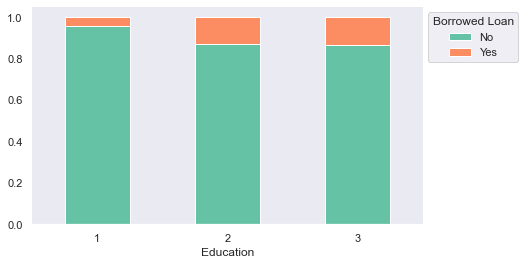

PersonalLoan           0    1   All
Securities-Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


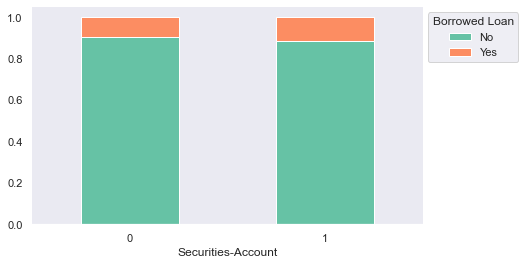

PersonalLoan     0    1   All
CD-Account                   
0             4358  340  4698
1              162  140   302
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


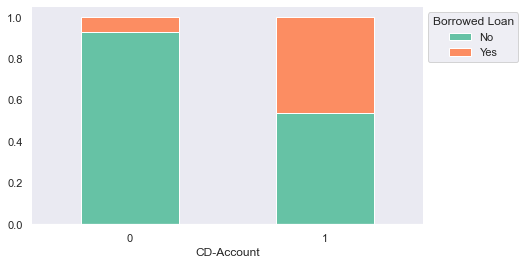

PersonalLoan     0    1   All
CreditCard                   
0             3193  337  3530
1             1327  143  1470
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


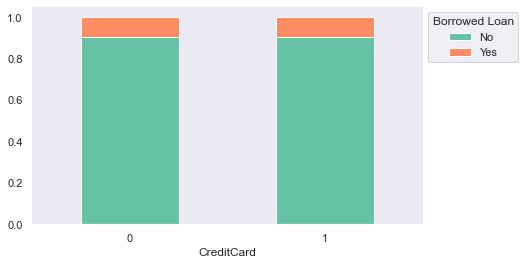

PersonalLoan     0    1   All
Online                       
0             1827  189  2016
1             2693  291  2984
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


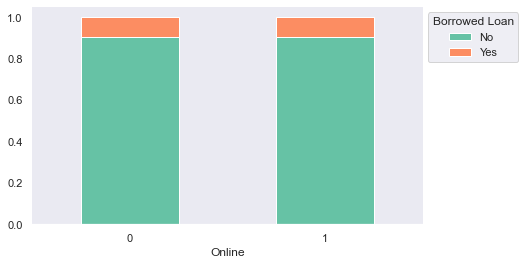

In [104]:
cat_columns=['Family','Education','Securities-Account','CD-Account','CreditCard','Online']
for i, variable in enumerate(cat_columns):
       stacked_plot(df[variable])

In [105]:
# در ستون میزان سابقه کار اعداد منفی مشاهده می کنیم که باید قدر مطلق آن ها گرفته شود تا مثبت شوند، طبیعتا سابقه کار منفی نداریم

df['Experience'] = df['Experience'].abs()

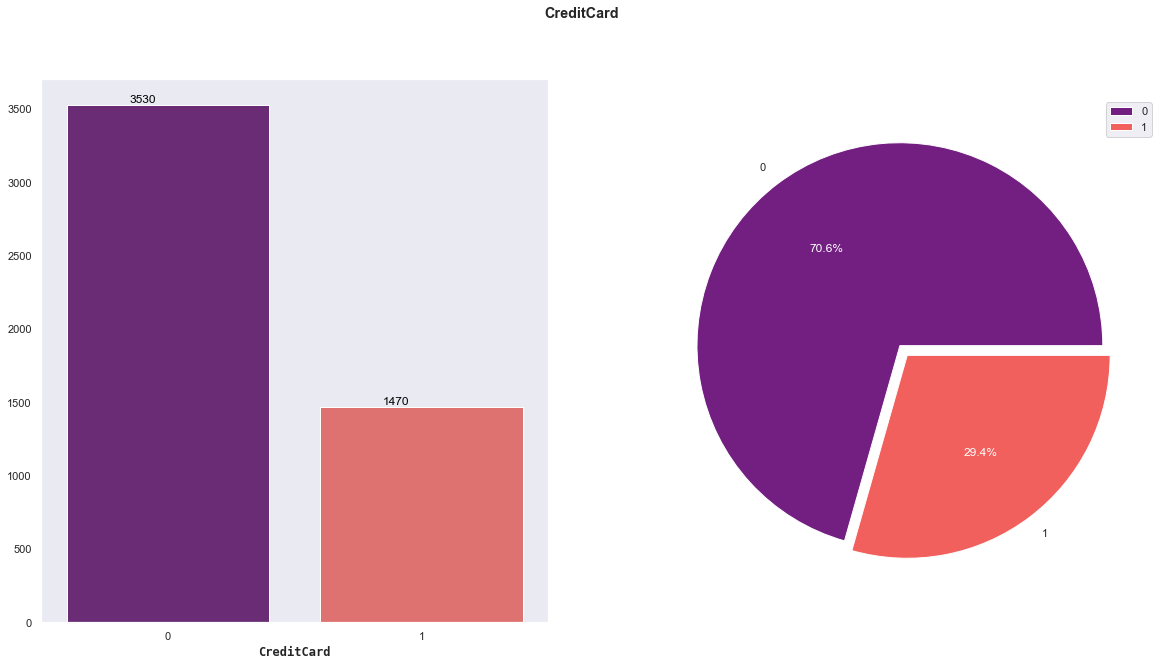

In [106]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
x=df['CreditCard'].value_counts().index
y=df['CreditCard'].value_counts().values.tolist()
data = df.groupby("CreditCard").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('CreditCard', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['CreditCard'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('CreditCard',weight = 'bold')
plt.show()

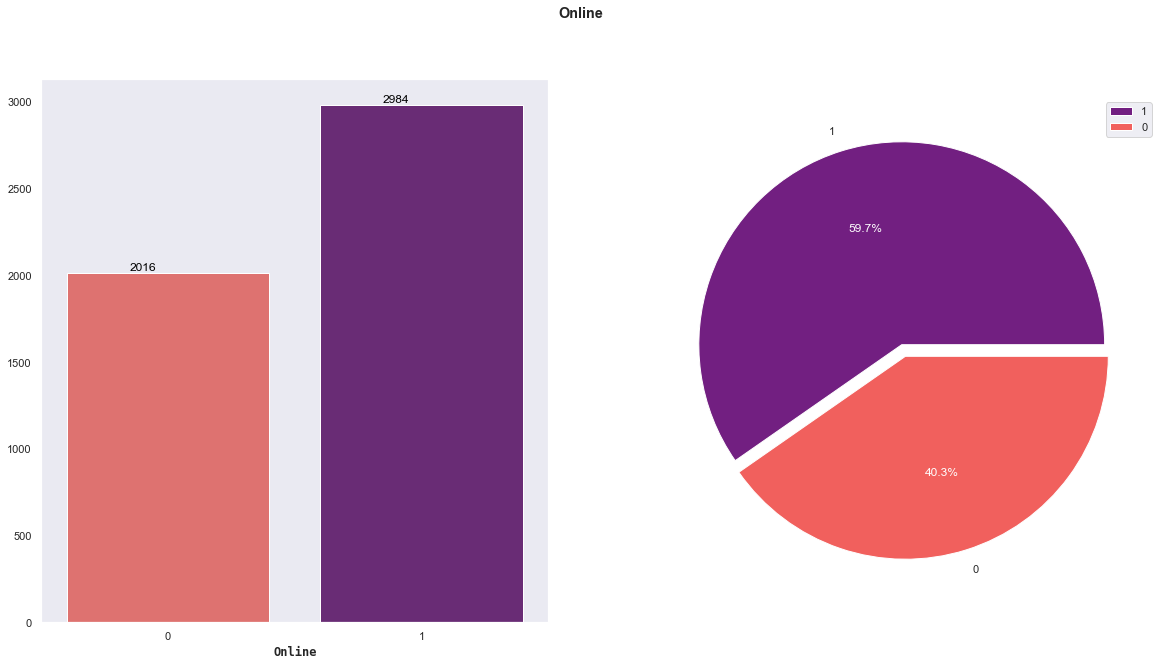

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
x=df['Online'].value_counts().index
y=df['Online'].value_counts().values.tolist()
data = df.groupby("Online").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Online', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['Online'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Online',weight = 'bold')
plt.show()

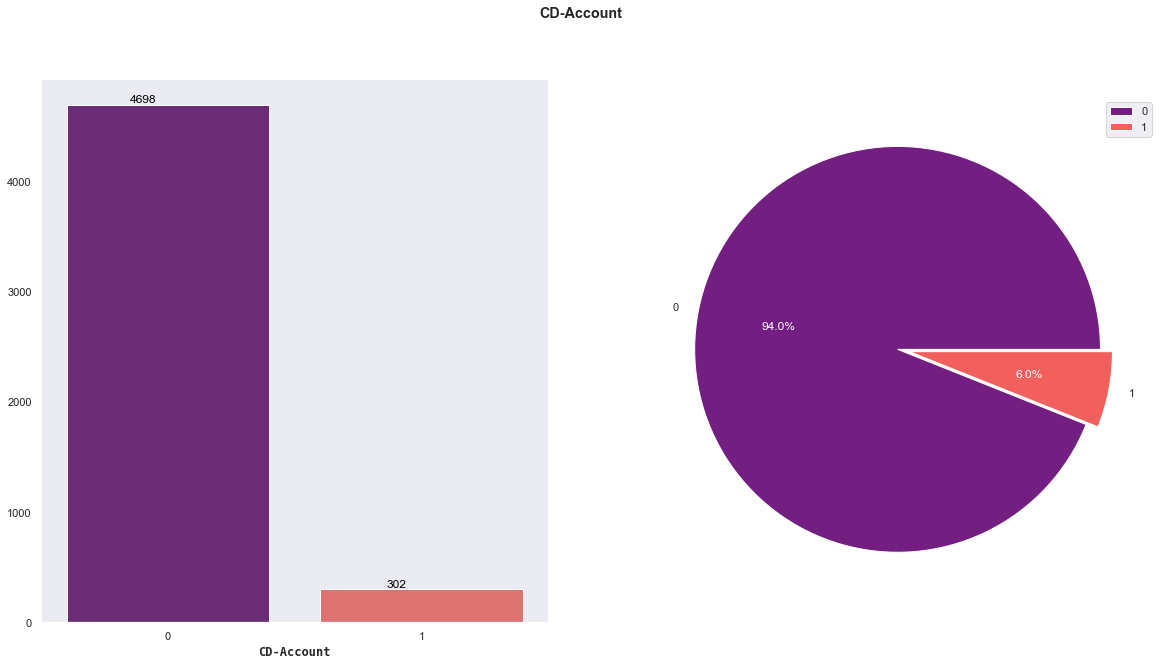

In [108]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
x=df['CD-Account'].value_counts().index
y=df['CD-Account'].value_counts().values.tolist()
data = df.groupby("CD-Account").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('CD-Account', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['CD-Account'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('CD-Account',weight = 'bold')
plt.show()

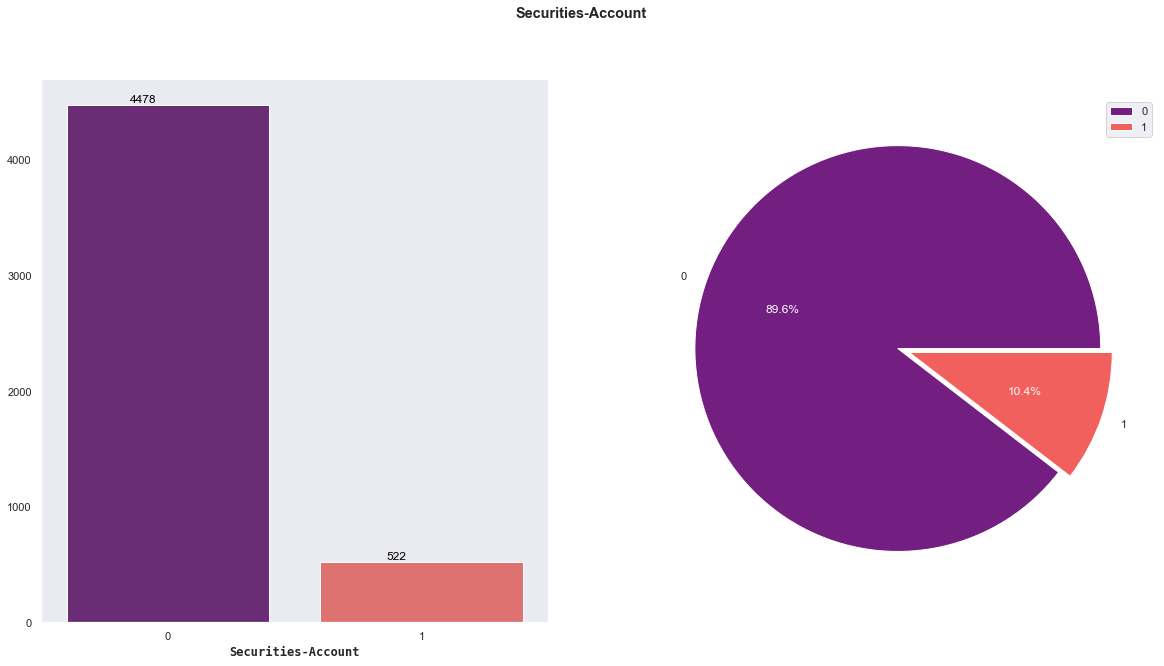

In [109]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
x=df['Securities-Account'].value_counts().index
y=df['Securities-Account'].value_counts().values.tolist()
data = df.groupby("Securities-Account").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Securities-Account', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['Securities-Account'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Securities-Account',weight = 'bold')
plt.show()

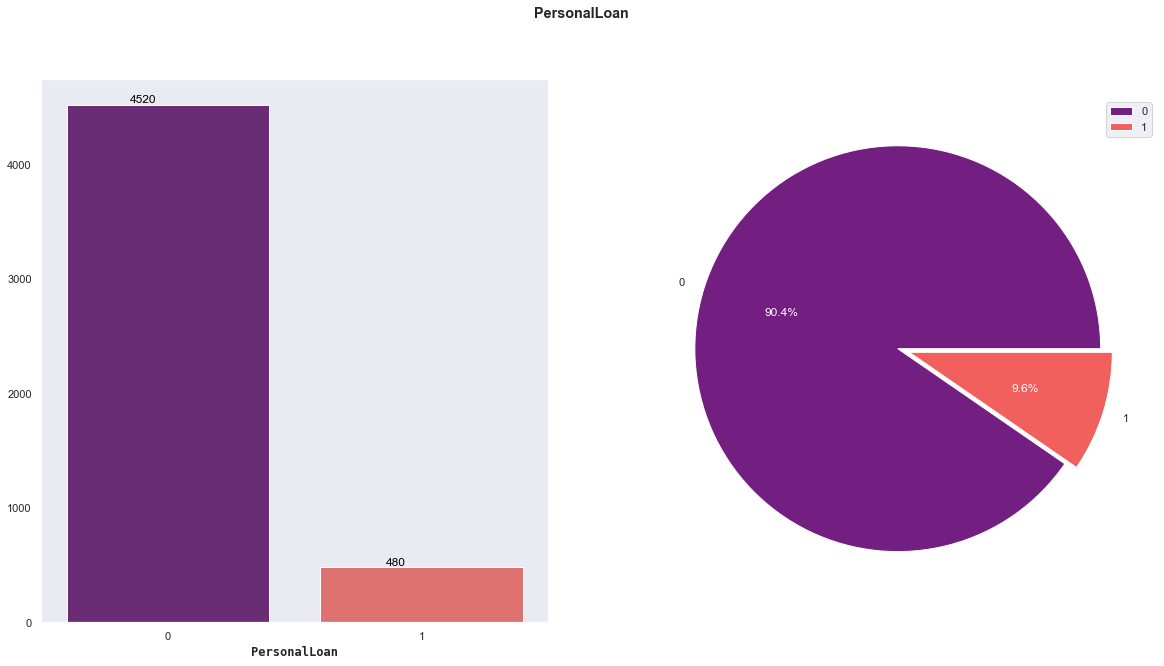

In [110]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
x=df['PersonalLoan'].value_counts().index
y=df['PersonalLoan'].value_counts().values.tolist()
data = df.groupby("PersonalLoan").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('PersonalLoan', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['PersonalLoan'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('PersonalLoan',weight = 'bold')
plt.show()

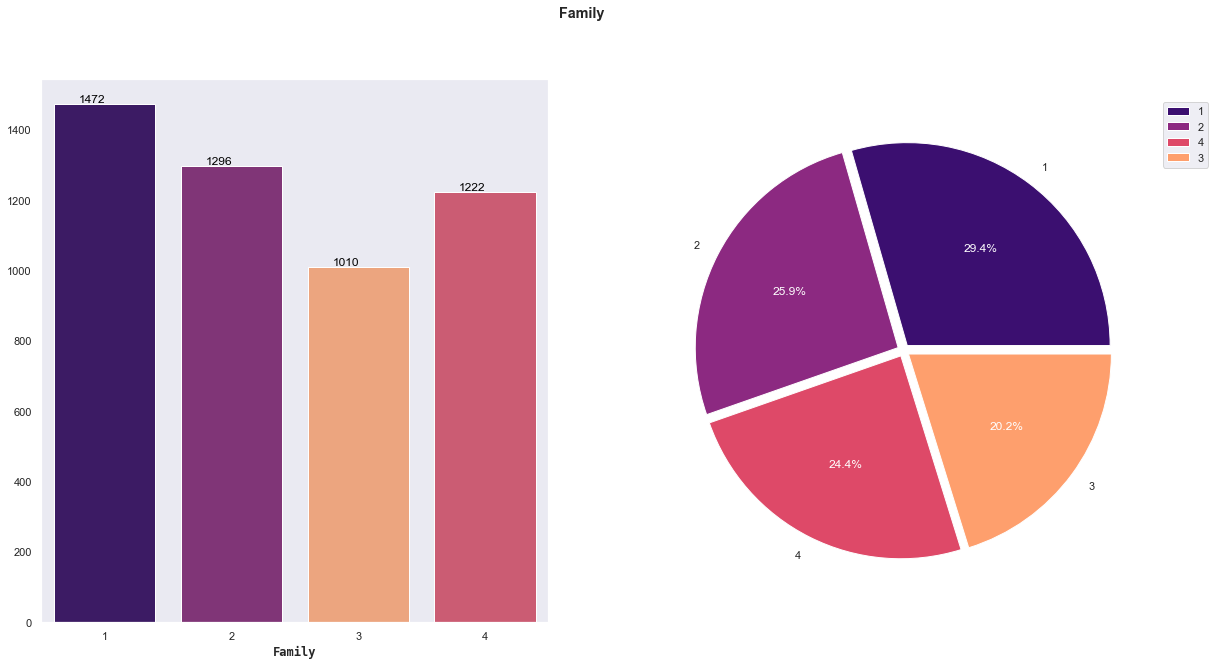

In [111]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
x=df['Family'].value_counts().index
y=df['Family'].value_counts().values.tolist()
data = df.groupby("Family").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Family', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['Family'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Family',weight = 'bold')
plt.show()

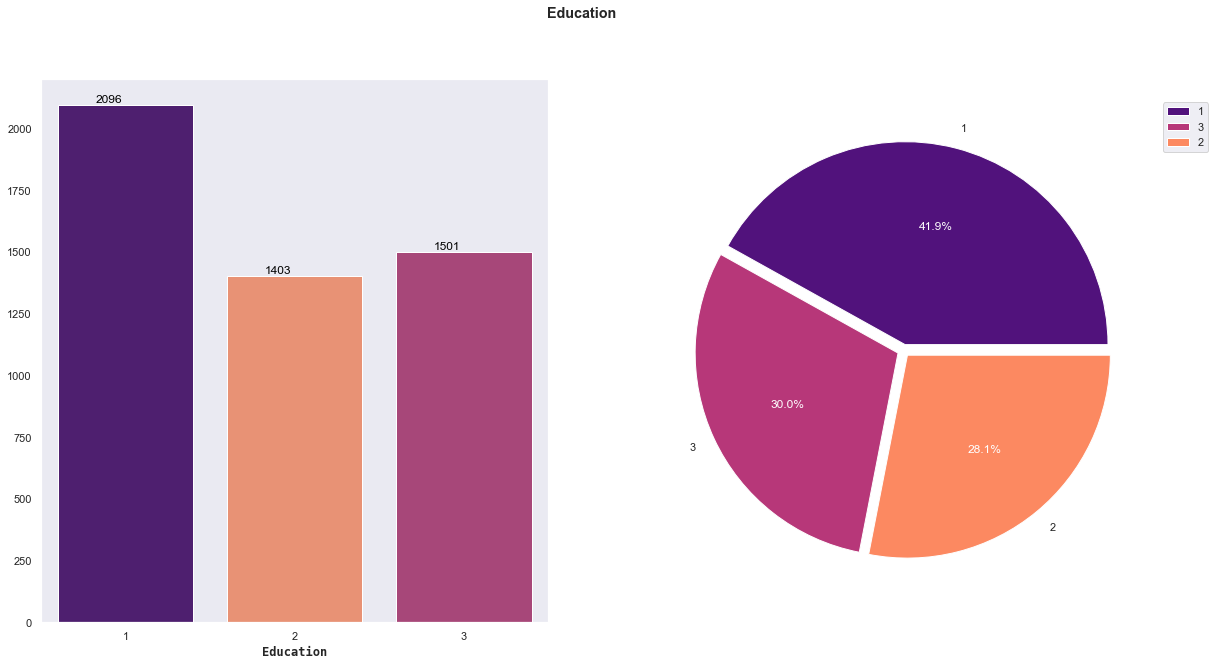

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
x=df['Education'].value_counts().index
y=df['Education'].value_counts().values.tolist()
data = df.groupby("Education").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Education', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['Education'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Education',weight = 'bold')
plt.show()

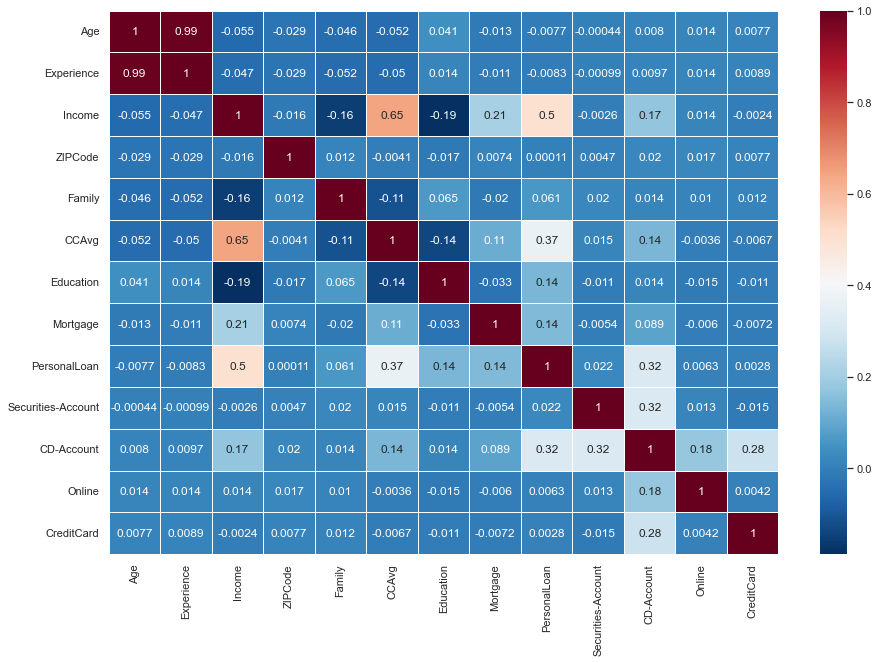

In [113]:
fig, ax = plt.subplots(figsize = (15, 10)) #Size of plot
ax = sns.heatmap(df.corr(),cmap='RdBu_r',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show()

In [114]:
# بیشترین کرولیشن تارگت با ستون های زیر است
# income, CCAvg, CD-acount

In [115]:
#correlation
df.corr()

Age  Experience    Income   ZIPCode    Family  \
Age                 1.000000    0.993991 -0.055269 -0.029216 -0.046418   
Experience          0.993991    1.000000 -0.046876 -0.028936 -0.051851   
Income             -0.055269   -0.046876  1.000000 -0.016410 -0.157501   
ZIPCode            -0.029216   -0.028936 -0.016410  1.000000  0.011778   
Family             -0.046418   -0.051851 -0.157501  0.011778  1.000000   
CCAvg              -0.052012   -0.049738  0.645984 -0.004061 -0.109275   
Education           0.041334    0.013919 -0.187524 -0.017377  0.064929   
Mortgage           -0.012539   -0.011097  0.206806  0.007383 -0.020445   
PersonalLoan       -0.007726   -0.008304  0.502462  0.000107  0.061367   
Securities-Account -0.000436   -0.000989 -0.002616  0.004704  0.019994   
CD-Account          0.008043    0.009735  0.169738  0.019972  0.014110   
Online              0.013702    0.014051  0.014206  0.016990  0.010354   
CreditCard          0.007681    0.008851 -0.002385  0.007691  0.011588   

                       CCAvg  Education  Mortgage  PersonalLoan  \
Age                -0.052012   0.041334 -0.012539     -0.007726   
Experience         -0.049738   0.013919 -0.011097     -0.008304   
Income              0.645984  -0.187524  0.206806      0.502462   
ZIPCode            -0.004061  -0.017377  0.007383      0.000107   
Family             -0.109275   0.064929 -0.020445      0.061367   
CCAvg               1.000000  -0.136124  0.109905      0.366889   
Education          -0.136124   1.000000 -0.033327      0.136722   
Mortgage            0.109905  -0.033327  1.000000      0.142095   
PersonalLoan        0.366889   0.136722  0.142095      1.000000   
Securities-Account  0.015086  -0.010812 -0.005411      0.021954   
CD-Account          0.136534   0.013934  0.089311      0.316355   
Online             -0.003611  -0.015004 -0.005995      0.006278   
CreditCard         -0.006689  -0.011014 -0.007231      0.002802   

                    Securities-Account  CD-Account    Online  CreditCard  
Age                          -0.000436    0.008043  0.013702    0.007681  
Experience                   -0.000989    0.009735  0.014051    0.008851  
Income                       -0.002616    0.169738  0.014206   -0.002385  
ZIPCode                       0.004704    0.019972  0.016990    0.007691  
Family                        0.019994    0.014110  0.010354    0.011588  
CCAvg                         0.015086    0.136534 -0.003611   -0.006689  
Education                    -0.010812    0.013934 -0.015004   -0.011014  
Mortgage                     -0.005411    0.089311 -0.005995   -0.007231  
PersonalLoan                  0.021954    0.316355  0.006278    0.002802  
Securities-Account            1.000000    0.317034  0.012627   -0.015028  
CD-Account                    0.317034    1.000000  0.175880    0.278644  
Online                        0.012627    0.175880  1.000000    0.004210  
CreditCard                   -0.015028    0.278644  0.004210    1.000000

In [116]:
df.corr()['PersonalLoan'].sort_values(ascending=False) #Correlation for get information

PersonalLoan          1.000000
Income                0.502462
CCAvg                 0.366889
CD-Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities-Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIPCode               0.000107
Age                  -0.007726
Experience           -0.008304
Name: PersonalLoan, dtype: float64

##  KNN MODEL

In [117]:


X = pd.DataFrame(df, columns = ["Age","Experience", "Income","ZIPCode", "Family","CCAvg","Education","Mortgage","Securities-Account","CD-Account","Online","CreditCard"]).values
Y = Data.PersonalLoan.values.reshape(-1,1)
X

array([[25.,  1., 49., ...,  0.,  0.,  0.],
       [45., 19., 34., ...,  0.,  0.,  0.],
       [39., 15., 11., ...,  0.,  0.,  0.],
       ...,
       [63., 39., 24., ...,  0.,  0.,  0.],
       [65., 40., 49., ...,  0.,  1.,  0.],
       [28.,  4., 83., ...,  0.,  1.,  1.]])

In [118]:
X_train, X_test, Y_train, Y_test  =  train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [119]:
K = 20
Acc = np.zeros((K))
for i in range(1 , K+1):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train,Y_train.ravel())
    Y_pred = clf.predict(X_test)
    Acc[i-1] = metrics.accuracy_score(Y_test, Y_pred)
Acc

array([0.894     , 0.91133333, 0.906     , 0.916     , 0.912     ,
       0.912     , 0.91066667, 0.914     , 0.91533333, 0.914     ,
       0.914     , 0.91266667, 0.912     , 0.914     , 0.91666667,
       0.916     , 0.91333333, 0.914     , 0.914     , 0.91266667])

In [120]:
# نمایش بیشترین و کمترین مقدار
print(np.max(Acc))
print(np.min(Acc))

0.9166666666666666
0.894


In [121]:
########  Another way

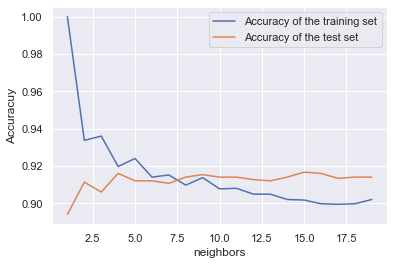

In [122]:
traing_acc = []
test_acc = []
# try KNN for diffrent k nearset neighbor from 1 ta 50
neighbors_setting = range(1,20)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train,Y_train.ravel())
    traing_acc.append(knn.score(X_train,Y_train))
    test_acc.append(knn.score(X_test, Y_test))

plt.plot(neighbors_setting, traing_acc, label = "Accuracy of the training set")
plt.plot(neighbors_setting, test_acc, label = "Accuracy of the test set")
plt.ylabel("Accuracuy")
plt.xlabel("neighbors")
plt.grid()
plt.legend()

In [123]:
######### Improval Model

In [124]:
from sklearn.model_selection import GridSearchCV
parametrs = {"n_neighbors": range(1,20) }
grid_kn = GridSearchCV(estimator = knn, #Model
                       param_grid = parametrs, #Range of K
                       scoring = "accuracy",
                       cv = 5,          # cross validation generator
                       verbose = 1,     #Time of calculate
                       n_jobs = -1)     #help to cpu
                       
            
                     
grid_kn.fit(X_train, Y_train.ravel())

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 20)}, scoring='accuracy',
             verbose=1)

In [125]:
# best values for K
grid_kn.best_params_

{'n_neighbors': 15}

In [126]:
# ایمپورت کردن کتابخانه برای گزارش گیری و ماتریس کانفیوژن
from sklearn.metrics import classification_report, confusion_matrix

In [127]:
#مشخص کردن تشخیص درست و غلط مدل
confusion_matrix(Y, clf.predict(X))

array([[4496,   24],
       [ 458,   22]], dtype=int64)

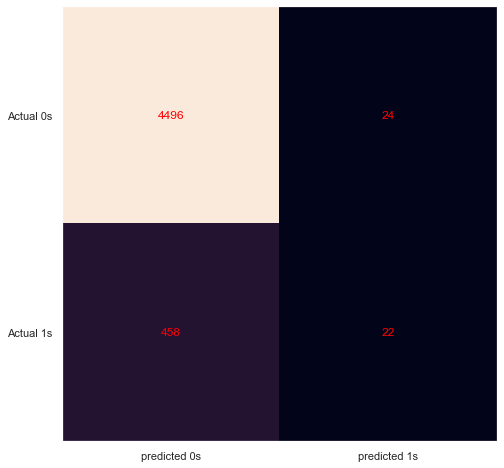

In [128]:
#ترسیم پلات
cm = confusion_matrix(Y, clf.predict(X))
fig , ax = plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1) , ticklabels = ("predicted 0s", "predicted 1s"))
ax.yaxis.set(ticks = (0,1) , ticklabels = ("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5 , -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i , cm[i,j], ha = "center" , va = "center", color = "red")   
plt.show()

In [129]:
#محاسبه دقت ها و گزارش ها
print(classification_report(Y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      4520
           1       0.48      0.05      0.08       480

    accuracy                           0.90      5000
   macro avg       0.69      0.52      0.52      5000
weighted avg       0.87      0.90      0.87      5000



In [130]:
# یک ورودی جدید وارد می کنیم تا مدل خروجی را برای ما پیش بینی کند

p1 = clf.predict([[42,16,30,92037,3,1.2,3,0,1,0,1,1]])
p1

array([0], dtype=int64)

## logistic regression

In [131]:


X1 = pd.DataFrame(df, columns = ["Age","Experience", "Income","ZIPCode", "Family","CCAvg","Education","Mortgage","Securities-Account","CD-Account","Online","CreditCard"])
Y1 = Data.PersonalLoan.values.reshape(-1,1)

In [132]:
#این 4 تا پارامتر را برای مدل سازی مشخص می کنیم
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size = 0.3, random_state =0 )

In [133]:
#الگوریتم لاجستیک رگرشن را صدا می کنیم
Logreg = LogisticRegression(solver = "liblinear", C=10 , random_state =0)

In [134]:
# x va y train ra dakhelesh fit mikonim
Logreg.fit(X1_train , Y1_train)
Y_pred = Logreg.predict(X1_test)

C:\Users\sara\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [135]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [136]:
print("Accuracy:" , metrics.accuracy_score(Y1_test,Y_pred ))

Accuracy: 0.9193333333333333


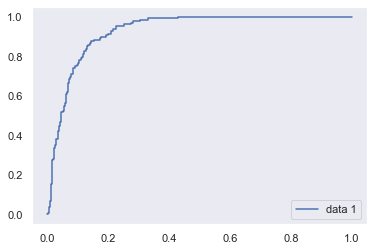

In [137]:
#ba ezafe kardan in yek khat code be raveshe logistic regression rasm mikonim
Y_pred_proba = Logreg.predict_proba(X1_test)[::,1]
fpr , tpr,_ = metrics.roc_curve(Y1_test,Y_pred_proba)
plt.plot(fpr , tpr, label = "data 1")
plt.legend(loc = 4)
plt.show()

In [138]:
# مقادیر و تعداد کلاس های خروجی را نمایش می دهد
Logreg.classes_

array([0, 1], dtype=int64)

In [139]:
# به دست آموردن شیب ها
Logreg.coef_

array([[-2.30793911e-03, -7.42298506e-03,  3.56178395e-02,
        -6.27323493e-05,  2.36830493e-02,  9.89857317e-03,
         2.77743457e-02,  9.40626180e-04,  1.90036695e-03,
         7.49933260e-03, -1.05056253e-03, -1.41327972e-05]])

In [140]:
#in proba daghighan meghdare aslie y ro namayesh midahad
# in 2 bodi namayesh midahad x ra ham neshan midahad
Logreg.predict_proba(X1)

array([[0.98006325, 0.01993675],
       [0.98974725, 0.01025275],
       [0.99663281, 0.00336719],
       ...,
       [0.99494372, 0.00505628],
       [0.98550431, 0.01449569],
       [0.944915  , 0.055085  ]])

In [141]:

Logreg.predict(X1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [142]:
Logreg.score(X1,Y1)

0.9086

In [143]:
#مشخص کردن تشخیص درست و غلط مدل
confusion_matrix(Y1, Logreg.predict(X1))

array([[4389,  131],
       [ 326,  154]], dtype=int64)

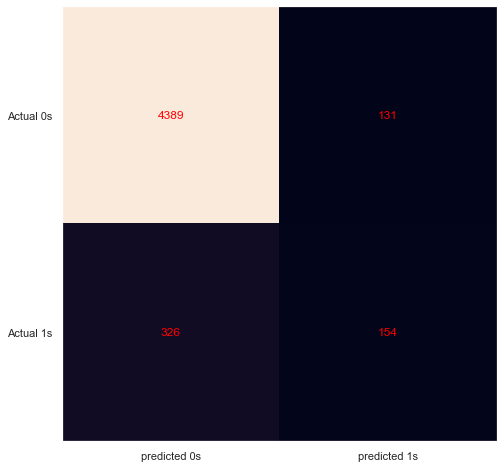

In [144]:
#ترسیم پلات
cm = confusion_matrix(Y, Logreg.predict(X))
fig , ax = plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1) , ticklabels = ("predicted 0s", "predicted 1s"))
ax.yaxis.set(ticks = (0,1) , ticklabels = ("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5 , -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i , cm[i,j], ha = "center" , va = "center", color = "red")   
plt.show()

In [145]:
#محاسبه دقت ها و گزارش ها
print(classification_report(Y1, Logreg.predict(X1)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4520
           1       0.54      0.32      0.40       480

    accuracy                           0.91      5000
   macro avg       0.74      0.65      0.68      5000
weighted avg       0.89      0.91      0.90      5000



In [146]:
# یک ورودی جدید وارد می کنیم تا مدل خروجی را برای ما پیش بینی کند

p2 = Logreg.predict([[42,16,30,92037,3,1.2,3,0,1,0,1,1]])
p2

array([0], dtype=int64)

## Naive bays

In [147]:
# maghadir x va y ra moshakhas mikonim

X2 = pd.DataFrame(df, columns=["Age","Experience", "Income","ZIPCode", "Family","CCAvg","Education","Mortgage","Securities-Account","CD-Account","Online","CreditCard"])
Y2 = Data.PersonalLoan.values.reshape(-1,1)

In [148]:
#این 4 تا پارامتر را برای مدل سازی مشخص می کنیم
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2, test_size = 0.3, random_state =0)

In [149]:
#مدل خود را طراحی می کنیم
clf2 = GaussianNB()
clf2.fit(X2_train, Y2_train.ravel())
Y2_pred = clf2.predict(X2_test)

In [150]:
#دقت را بررسی می کنیم
print("Accuracy:", metrics.accuracy_score(Y2_test, Y2_pred))

Accuracy: 0.8886666666666667


In [151]:
#تعداد کلاس های خروجی را مشخص می کنیم
clf2.classes_

array([0, 1], dtype=int64)

In [152]:
#مشخص کردن تشخیص درست و غلط مدل
confusion_matrix(Y2, clf2.predict(X2))

array([[4157,  363],
       [ 197,  283]], dtype=int64)

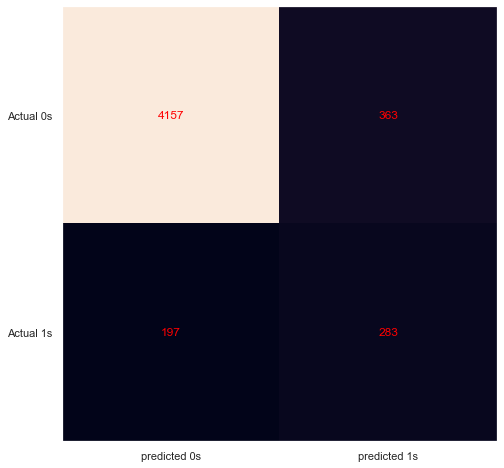

In [153]:
#ترسیم پلات
cm = confusion_matrix(Y, clf2.predict(X))
fig , ax = plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1) , ticklabels = ("predicted 0s", "predicted 1s"))
ax.yaxis.set(ticks = (0,1) , ticklabels = ("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5 , -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i , cm[i,j], ha = "center" , va = "center", color = "red")   
plt.show()

In [154]:
#محاسبه دقت ها و گزارش ها
print(classification_report(Y2, clf2.predict(X2)))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      4520
           1       0.44      0.59      0.50       480

    accuracy                           0.89      5000
   macro avg       0.70      0.75      0.72      5000
weighted avg       0.91      0.89      0.90      5000



In [155]:
# یک ورودی جدید وارد می کنیم تا مدل خروجی را برای ما پیش بینی کند

p3 = clf2.predict([[42,16,30,92037,3,1.2,3,0,1,0,1,1]])
p3

array([0], dtype=int64)

###  نتیجه گیری

In [156]:
## best algorithm is Logistic Regression
##  Accuracy: 0.9193333333333333
## The number of 4552 diagnosis is correct
